# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# TODO - code!

# P(drunk|+)= (P(+|drunk)*P(drunk))/P(+)

def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):
  pop_d = prob_drunk_prior
  pop_s = 1-pop_d  # s is for sober
  f_pos = false_positive_rate
  t_pos = 1 # I know its given and not part of the function, I just wanted to do it
  numerator = t_pos * pop_d
  denominator = (pop_d * t_pos) + (pop_s * f_pos)
  return numerator/denominator

In [8]:
# First test
prob_drunk_given_positive( .001 , .08)

0.012357884330202669

In [9]:
# I didnt believe it so I had to double check
.001 / (.001 + (.999 * .08))

0.012357884330202669

In [11]:
# Second test
prob_drunk_given_positive( 0.012357884330202669, .08)

0.13525210993291495

In [0]:
# About to try something Ive never done before
def test_count(prob_drunk, prior_tests):
  T = prior_tests
  result = prob_drunk_given_positive(prob_drunk , .08)
  if result > .95:
    print(T + 1)
    print(result)
  else:
    T= T + 1
    test_count(result, T)
# This scares me, calling a function within itself

In [17]:
test_count(.001, 0)

4
0.9606895076105054


In [0]:
# So it turns out I could have just run the last two tests manually
# but I wanted to try something new
# Also the answer is 4 tests and the probability after those tests is 96%

In [0]:
### Part Two of the assignment

In [0]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-02-05 01:25:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.04s   

2020-02-05 01:25:37 (498 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [25]:
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

df = pd.read_csv('house-votes-84.data', 
                 header=None, 
                 names=column_headers,
                 na_values="?")

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [26]:
dic = {'y': 1, 'n': 0}

polit_df= df
polit_df= polit_df.replace(dic)
polit_df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
# Not even going to break them down by parties this time, just straight congressional support

In [35]:
polit_df['physician-fee-freeze'].value_counts(dropna=False)

0.0    247
1.0    177
NaN     11
Name: physician-fee-freeze, dtype: int64

In [37]:
pff_df = polit_df['physician-fee-freeze'].dropna()

pff_df.shape[0]

424

In [40]:
# Frequentist
Freq = stats.t.interval(.95,
                        pff_df.shape[0],
                        loc = pff_df.mean(),
                        scale = stats.sem(pff_df))

Freq

(0.37032378704117536, 0.4645818733361831)

In [73]:
# Bayesian
Baye = stats.bayes_mvs(pff_df, alpha=.95)[0][1]
Baye

(0.37032346810896244, 0.46458219226839603)

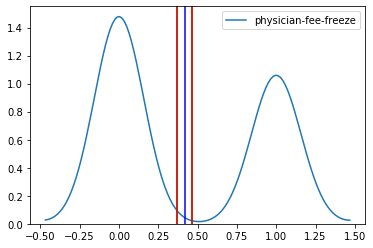

In [76]:
# I wanted to do a bar plot, but I realized it was too much trouble to make it work

ax = sns.kdeplot(pff_df)
plt.axvline(x=pff_df.mean(), color= 'b')
plt.axvline(x=Freq[0], color= 'g')
plt.axvline(x=Freq[1], color= 'g')
plt.axvline(x=Baye[0], color= 'r')
plt.axvline(x=Baye[1], color= 'r');

In [0]:
# My own words: the difference between bayes and frequentist below

I want to keep it simple, but its not that simple. So I'll do my best to keep it simple.

Starting with the Frequentist approach. There a few main features that separate it from Bayesian.
1) In a word: its objective. The methodology is all laid out, all you need is a dataset and you're ready to go.
2) Its less computationally intensive. its a lot easier on computers in general. You basically just extract three values from a dataset (mean, standard error, and degrees of freedom) and all further calculations are based on those values.
3) This is more meta and less procedural, but this approach imagines a complete data set from which the data in the hands of any human is merely a sample of that complete data. Everything being done is about making probabilistic inferences about the True Mean of this perfect data set. 

Onto the Bayesian approach.
1) Where the Frequentist approach is objective, the Bayesian approach has a measure of subjectivity. Ultimately it starts with a human derived hypothesis, which is then tested by the method. The more data points and the better the hypoothesis, the stronger the result.
2) It also happens to be rather intesive computationally. And thats part of the tradeoff one gets in exchange for a model that is capable of readily accepting new data into an already built model, something the frequentist approach cannot do.
3) Again, more meta and less procedural, but this method does not imagine some perfect sample from which all data is derived. instead, it simply tries to model the data being fed into it, with a little bit of bias towards the human input. Though that bias does fade as the sample data becomes more robust.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!